In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('AAPL_data.csv')

In [6]:
! pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


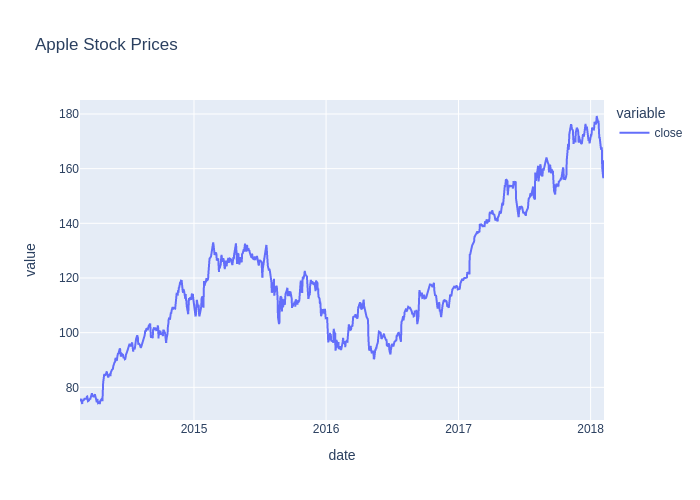

In [3]:
import plotly.express as px

fig = px.line(data[-1000:], x="date", y=['close'],
              title='Apple Stock Prices')

fig.show('png')

In [5]:
data['diff'] = - data['close'] + data['close'].shift(-1)
data['class'] = data['diff'].apply(lambda x: 1 if x >= 0 else -1)
data

,date,open,high,low,close,volume,Name,diff,class
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.7072,1
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,-1.7186,-1
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-0.1272,-1
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0600,-1
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.9185,-1
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,-7.2800,-1
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-4.0100,-1
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,6.5400,1
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,-3.4900,-1


In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

data = data.dropna()
X = np.array(data[['close']])
y = np.array(data['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, shuffle=False)
reg = SVC().fit(X_train, y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.45      0.56      0.50       176
           1       0.51      0.41      0.45       202

    accuracy                           0.48       378
   macro avg       0.48      0.48      0.48       378
weighted avg       0.48      0.48      0.47       378



In [7]:
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(), X, y, scoring='f1').mean()

0.5642420154373113

In [8]:
!pip install iOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 15.4 MB/s eta 0:00:00


# Find Optimal Parameters of SVC


--------------------------------------------------------------
|                      Task Description                      |
--------------------------------------------------------------
|                  dimension:  2                             |
|                     bounds:  [[1.0, 6.0], [-7.0, -3.0]]    |
|   objective-function count:  1                             |
|  constraint-function count:  0                             |
--------------------------------------------------------------
|                     Method Parameters                      |
--------------------------------------------------------------
|                        eps:  0.01                          |
|                          r:  3.0                           |
|                      eps_r:  0.01                          |
|                iters_limit:  100                           |
|  number_of_parallel_points:  1                             |
------------------------------------------------------

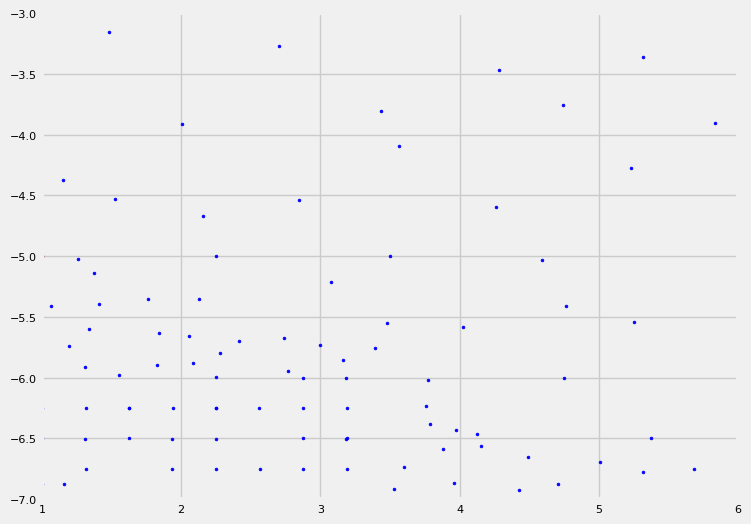

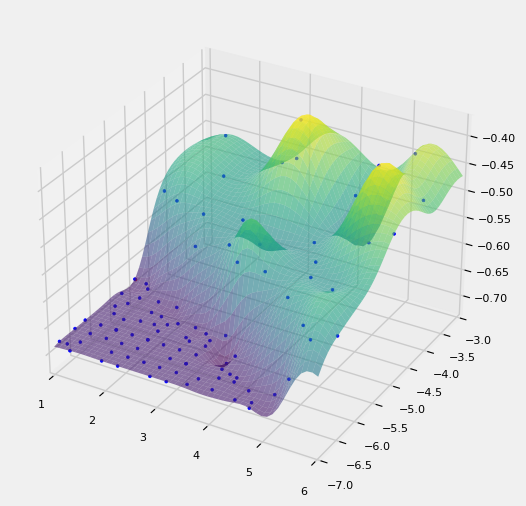

In [8]:
from iOpt.output_system.listeners.static_painters import StaticPainterNDListener
from iOpt.output_system.listeners.animate_painters import AnimatePainterNDListener
from iOpt.output_system.listeners.console_outputers import ConsoleOutputListener

from iOpt.solver import Solver
from iOpt.solver_parametrs import SolverParameters
from examples.Machine_learning.SVC._2D.Problems import SVC_2d
import numpy as np

regularization_value_bound = {'low': 1, 'up': 6}
kernel_coefficient_bound = {'low': -7, 'up': -3}

problem = SVC_2d.SVC_2D(X, y, regularization_value_bound, kernel_coefficient_bound)

method_params = SolverParameters(r=np.double(3.0), iters_limit=100)
solver = Solver(problem, parameters=method_params)

apl = AnimatePainterNDListener("svc2d_anim.png", "output", vars_indxs=[0, 1], to_paint_obj_func=False)
solver.add_listener(apl)

spl = StaticPainterNDListener("svc2d_stat.png", "output", vars_indxs=[0, 1], mode="surface", calc="interpolation")
solver.add_listener(spl)

cfol = ConsoleOutputListener(mode='full')
solver.add_listener(cfol)

solver_info = solver.solve()